In [1]:
import matplotlib.pyplot as plt
import numpy as np
import iltn
import tensorflow as tf
from iltn.utils.ops import softplus

In [2]:
iltn.utils.plot.set_tex_style()

In [3]:
A = iltn.events.TrapzEvent("A", [2,4,6,8], trainable=False, beta=2.)

In [4]:
def mf(x, trapz: iltn.events.TrapzEvent, smooth=False, beta=1.):
    if smooth:
        res = tf.where(
            x<=trapz.a,
            softplus(x-trapz.a, beta=beta),
            tf.where(
                x<=trapz.b,
                (x-trapz.a)/tf.maximum(trapz.b-trapz.a,1e-9), # fix for crisp edge
                tf.where(
                    x<=trapz.c,
                    1.-softplus(tf.maximum(trapz.b-x,x-trapz.c), beta=beta),
                    tf.where(
                        x<=trapz.d,
                        (x-trapz.d)/tf.minimum(trapz.c-trapz.d,-1e-9), # fix for crisp edge 
                        softplus(trapz.d-x, beta=beta)
                    )
                )
            )
        )
    else:
        res = tf.where(
            x<=trapz.a,
            0.,
            tf.where(
                x<=trapz.b,
                (x-trapz.a)/tf.maximum(trapz.b-trapz.a,1e-9), # fix for crisp edge
                tf.where(
                    x<=trapz.c,
                    1.,
                    tf.where(
                        x<=trapz.d,
                        (x-trapz.d)/tf.minimum(trapz.c-trapz.d,-1e-9), # fix for crisp edge
                        0.
                    )
                )
            )
        )
    return res

In [5]:
def calculate_derivatives(x, trapz: iltn.events.TrapzEvent, **kwargs):
    with tf.GradientTape() as tape:
        x_var = tf.Variable(x)
        y = mf(x_var, trapz, **kwargs)
    grads = tape.gradient(y,x_var)
    return grads.numpy()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-31 14:14:57.539702: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-31 14:14:57.539876: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


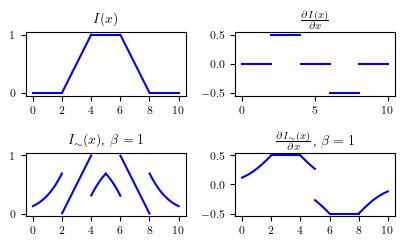

In [6]:
fig, axes = plt.subplots(2,2,figsize=iltn.utils.plot.set_size(300., subplots=(2, 2)))
for ax in (axes[0][0], axes[1][0]):
    ax.set_yticks([0.,1.])
    ax.set_xticks([0.,A.a,A.b,A.c,A.d,10.])

for ax in ( axes[1][0],axes[1][1]):
    ax.set_xticks([0.,A.a,A.b,A.c,A.d,10.])

x = np.arange(0.,A.a,0.01).astype(np.float32)
axes[0][0].plot(x, mf(x,A), c="blue")
axes[1][0].plot(x, mf(x,A,smooth=True), c="blue")
axes[0][1].plot(x, calculate_derivatives(x,A), c="blue")
axes[1][1].plot(x, calculate_derivatives(x,A, smooth=True, beta=1.), c="blue")

x = np.arange(A.a+.01,A.b,0.01).astype(np.float32)
axes[0][0].plot(x, mf(x,A), c="blue")
axes[1][0].plot(x, mf(x,A,smooth=True), c="blue")
axes[0][1].plot(x, calculate_derivatives(x,A), c="blue")
axes[1][1].plot(x, calculate_derivatives(x,A, smooth=True, beta=1.), c="blue")

x = np.arange(A.b+.01,(A.b+A.c)/2,0.01).astype(np.float32)
axes[0][0].plot(x, mf(x,A), c="blue")
axes[1][0].plot(x, mf(x,A,smooth=True), c="blue")
axes[0][1].plot(x, calculate_derivatives(x,A), c="blue")
axes[1][1].plot(x, calculate_derivatives(x,A, smooth=True, beta=1.), c="blue")
x = np.arange((A.b+A.c)/2+.01,A.c,0.01).astype(np.float32)
axes[0][0].plot(x, mf(x,A), c="blue")
axes[1][0].plot(x, mf(x,A,smooth=True), c="blue")
axes[0][1].plot(x, calculate_derivatives(x,A), c="blue")
axes[1][1].plot(x, calculate_derivatives(x,A, smooth=True, beta=1.), c="blue")

x = np.arange(A.c+.01,A.d,0.01).astype(np.float32)
axes[0][0].plot(x, mf(x,A), c="blue")
axes[1][0].plot(x, mf(x,A,smooth=True), c="blue")
axes[0][1].plot(x, calculate_derivatives(x,A), c="blue")
axes[1][1].plot(x, calculate_derivatives(x,A, smooth=True, beta=1.), c="blue")

x = np.arange(A.d+.01,10.,0.01).astype(np.float32)
axes[0][0].plot(x, mf(x,A), c="blue")
axes[1][0].plot(x, mf(x,A,smooth=True), c="blue")
axes[0][1].plot(x, calculate_derivatives(x,A), c="blue")
axes[1][1].plot(x, calculate_derivatives(x,A, smooth=True, beta=1.), c="blue")

axes[0][0].set_title(r'$I(x)$')
axes[1][0].set_title(r'$I_\sim(x)$, $\beta=1$')
axes[0][1].set_title(r'$\frac{\partial I(x)}{\partial x}$')
axes[1][1].set_title(r'$\frac{\partial I_\sim(x)}{\partial x}$, $\beta=1$')

plt.tight_layout()
plt.plot()
plt.savefig("membership_functions.pdf")

In [7]:
with tf.GradientTape() as tape:
    x = tf.Variable(-90.)
    y = iltn.utils.ops.softplus(x)
grads = tape.gradient(y,x)
print(grads)

tf.Tensor(0.0, shape=(), dtype=float32)
